# Graph Visualization
In the box below, you see the imports, including our Neo4j utility, which is a singleton that includes the necessary functions we implemented in the previous tutorials.

In [1]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the directory containing neo4j_utils.py (assuming test.ipynb is in task_1 folder)
module_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', 'utils'))

# Check if the path is already in sys.path and add it if not
if module_path not in sys.path:
    print(f"Adding {module_path} to sys.path")
    sys.path.append(module_path)

import neo4j_utils as neo4j

# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Verify the connection
if db.verify_connection():
    print("Connection to Neo4j is successful!")
else:
    print("Connection to Neo4j failed!")

# close the connection
db.close()

Adding /Users/ramadanomar/projects/dsis-2024/Graph_Data_Analytics/utils to sys.path
Connection to Neo4j is successful!


## Simple Visualization
This is the most straightforward approach for graph visualization. Here, we perform the visualization for the entire graph. What do you notice?

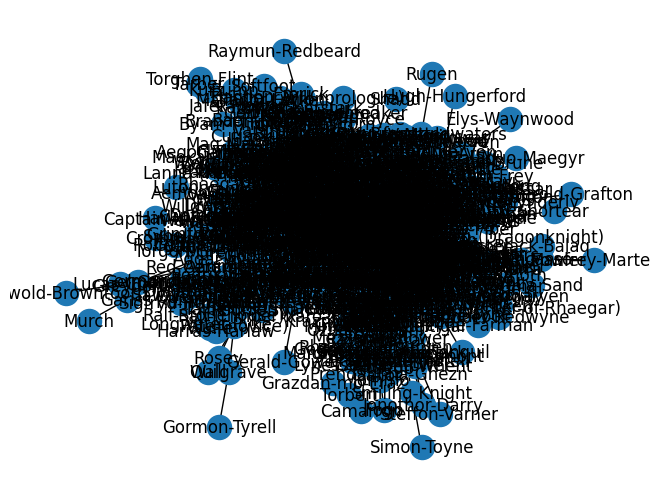

In [2]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Draw the graph (optional)
nx.draw(graph, with_labels=True)
plt.show()

# Close the Neo4j connection when done
db.close()

## Improved Visualization
To improve the layout, we switched to NetworkX's spring layout ([documentation here](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)) and adjusted the node size based on degree.


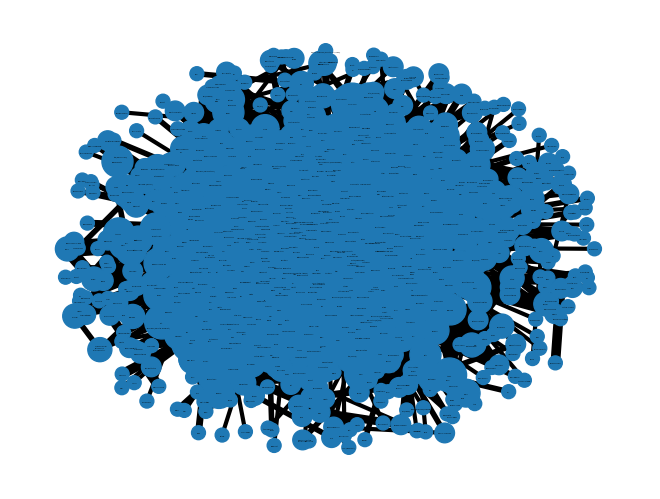

In [3]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Adjust layout for better visualization
pos = nx.spring_layout(graph, k=0.5, iterations=50)  # Adjusting the `k` parameter can help spread out nodes

# Draw the graph with improved layout and styling
node_sizes = [100 * graph.degree[node] for node in graph.nodes()]
edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]

# Draw the graph (optional)
nx.draw(graph, pos, node_size=node_sizes, width=edge_weights, with_labels=True, font_size=1)
plt.show()

# Close the Neo4j connection when done
db.close()

## Improved Visualization
To improve the layout, we switched to NetworkX's spring layout ([documentation here](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)), adjusted the node and edge sizes to static values, and increased the number of iterations for the layout algorithm.


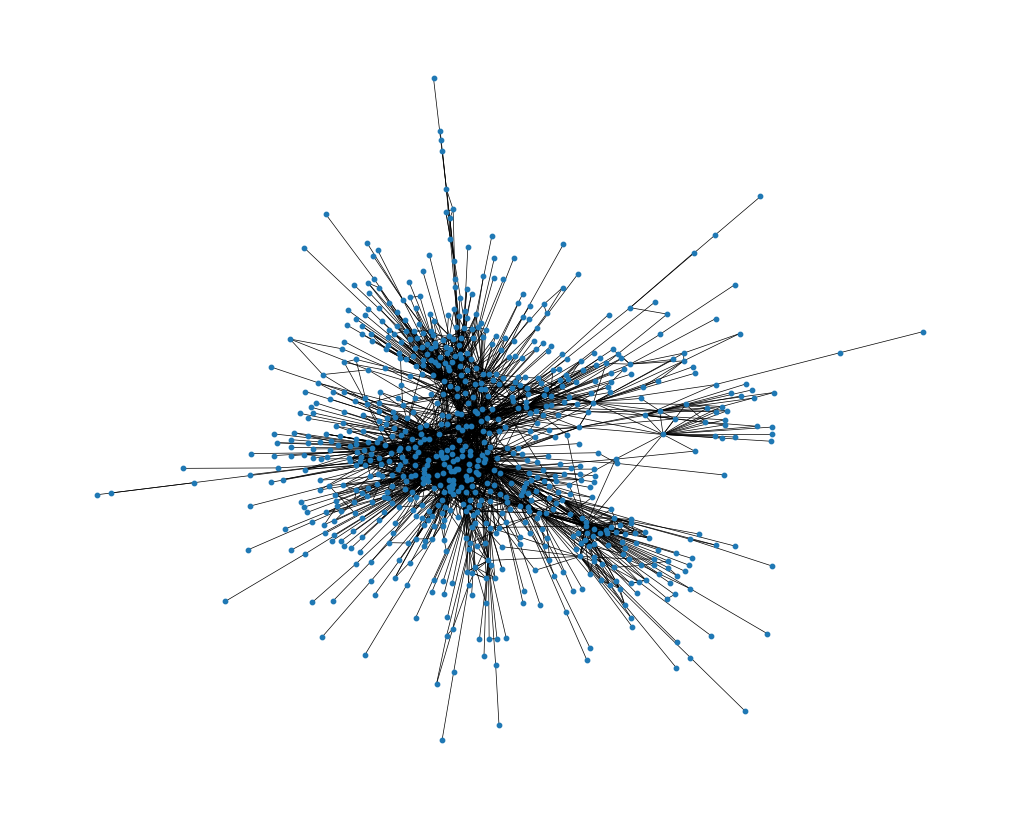

In [4]:
# Get the instance of the Neo4jConnection
db = neo4j.Neo4jConnection.get_instance()

# Load data into NetworkX
graph = db.load_data_into_networkx()

# Adjust layout parameters
pos = nx.spring_layout(graph, k=0.5, iterations=600)

# Create a larger figure
plt.figure(figsize=(10, 8))

# Draw the graph with adjusted parameters
nx.draw(graph, pos, node_size=10, width=0.5, with_labels=False)
plt.show()

# Close the Neo4j connection when done
db.close()